## Importing packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date
import seaborn as sns
from pydataset import data
from wrangle import acquire, prepare, split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Acquiring data from local file

In [2]:
credit = acquire()

## Preparing the data

In [3]:
credit = prepare(credit)

## Splitting the data

In [4]:
train, validate, test = split(credit)

## Exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 7897 to 9853
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   churn                       5670 non-null   int64   
 1   age                         5670 non-null   int64   
 2   gender                      5670 non-null   object  
 3   dependents                  5670 non-null   int64   
 4   education                   5670 non-null   object  
 5   marital_status              5670 non-null   object  
 6   income                      5670 non-null   object  
 7   card_type                   5670 non-null   object  
 8   tenure                      5670 non-null   int64   
 9   products_used               5670 non-null   int64   
 10  inactive_months_past_year   5670 non-null   int64   
 11  contacted_past_year         5670 non-null   int64   
 12  credit_limit                5670 non-null   float64 
 13  revolving_bal_t

### Univariate

<AxesSubplot:>

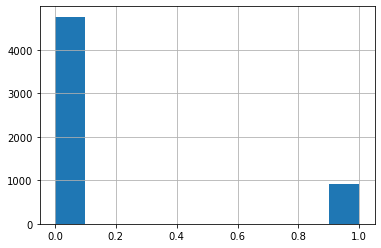

In [6]:
# Churn distribution

train.churn.hist()

(<AxesSubplot:>,
 count    5670.000000
 mean       46.414638
 std         8.043652
 min        26.000000
 25%        41.000000
 50%        46.000000
 75%        52.000000
 max        70.000000
 Name: age, dtype: float64)

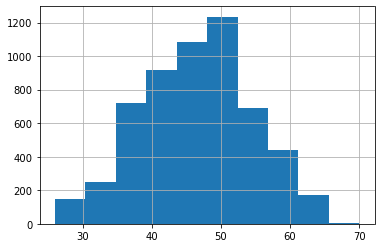

In [7]:
# Age distribution

train.age.hist(), train.age.describe()

<AxesSubplot:>

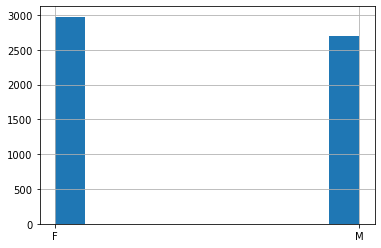

In [8]:
# Gender distribution

train.gender.hist()

<AxesSubplot:>

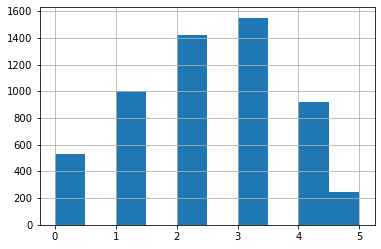

In [9]:
# Dependents distribution

train.dependents.hist()

<AxesSubplot:>

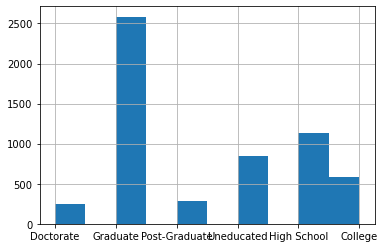

In [10]:
# Education distribution

train.education.hist()

<AxesSubplot:>

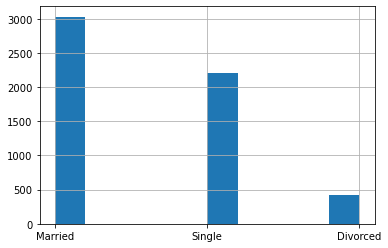

In [11]:
# Marital status distribution

train.marital_status.hist()

<AxesSubplot:>

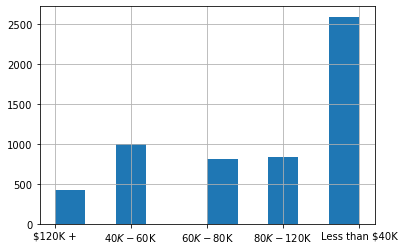

In [12]:
# Income distribution

train.sort_values('income').income.hist()

<AxesSubplot:>

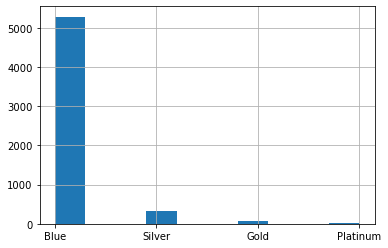

In [13]:
# Card type distribution

train.card_type.hist()

(<AxesSubplot:>,
 count    5670.000000
 mean       35.986243
 std         8.055121
 min        13.000000
 25%        32.000000
 50%        36.000000
 75%        40.000000
 max        56.000000
 Name: tenure, dtype: float64)

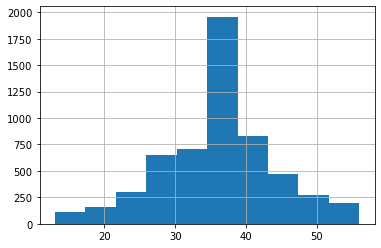

In [14]:
# Distribution of months with the bank

train.tenure.hist(), train.tenure.describe()

<AxesSubplot:>

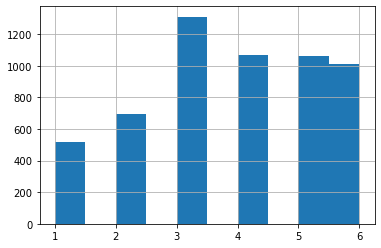

In [15]:
# Distribution of number of products used by customers

train.products_used.hist()

(<AxesSubplot:>,
 count    5670.000000
 mean        2.345150
 std         1.000048
 min         0.000000
 25%         2.000000
 50%         2.000000
 75%         3.000000
 max         6.000000
 Name: inactive_months_past_year, dtype: float64)

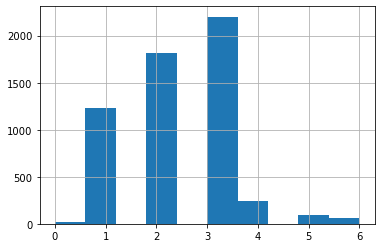

In [16]:
# Distribution of number of months inactive in the past year

train.inactive_months_past_year.hist(), train.inactive_months_past_year.describe()

<AxesSubplot:>

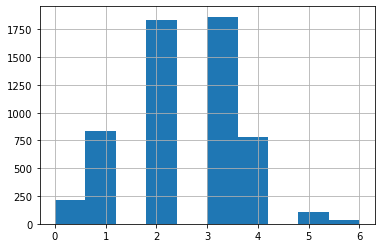

In [17]:
# Distribution of times contacting the bank in the past year

train.contacted_past_year.hist()

<AxesSubplot:>

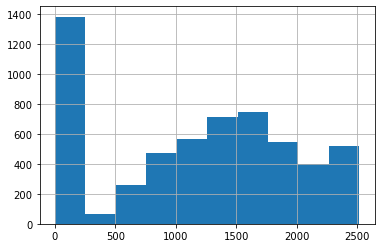

In [18]:
# Total revolving balance distribution, might be useful to bin these

train.revolving_bal_tot.hist()

<AxesSubplot:>

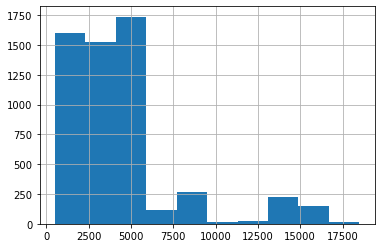

In [19]:
# Total transaction amount distribution

train.tot_trans_amt.hist()

<AxesSubplot:>

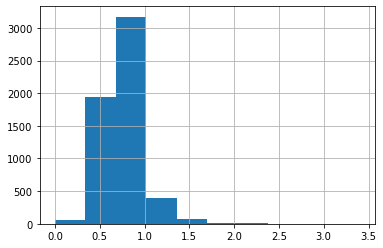

In [20]:
# Change in spending from Q4 to Q1 distribution (Calculated Q4/Q1)

train.trans_amt_chng_q4_q1.hist()

<AxesSubplot:>

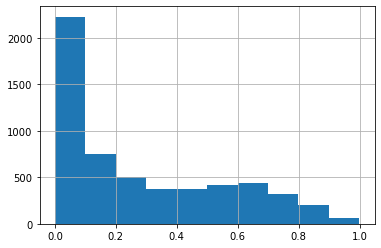

In [21]:
# Distribution of average utilization ratio (Credit used/ Available credit)

train.avg_card_utilization_ratio.hist()

### Bivariate

(<AxesSubplot:xlabel='income', ylabel='count'>,
 income
 $120K +           0.159251
 $40K - $60K       0.155779
 $60K - $80K       0.140394
 $80K - $120K      0.145238
 Less than $40K    0.174114
 Name: churn, dtype: float64)

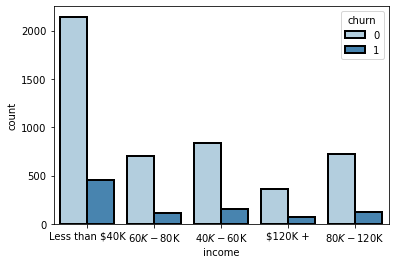

In [30]:
# Count of churned customers by income group, churn ratios on top
# Churned cutomers ratio is pretty even for each income bracket

sns.countplot(x = 'income', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('income').churn.mean()

<AxesSubplot:xlabel='inactive_months_past_year', ylabel='count'>

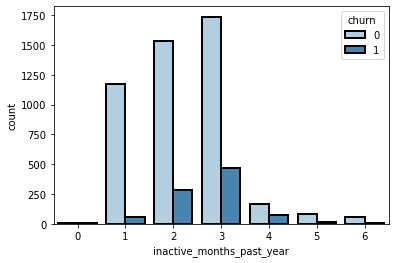

In [23]:
# Count of churned customers by number of months they were inactive last year
# Seems as though there is a directly proportional relationship between inactive months and churn

sns.countplot(x = 'inactive_months_past_year', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2)

In [24]:
# Churn ratios by inactive months, with total average churn on the bottom
# Peaks at 4 months and then starts to drop off

train.groupby('inactive_months_past_year').churn.mean(), train.churn.sum()/5670

(inactive_months_past_year
 0    0.411765
 1    0.046229
 2    0.156130
 3    0.211268
 4    0.311203
 5    0.136842
 6    0.156250
 Name: churn, dtype: float64,
 0.16067019400352733)

<AxesSubplot:xlabel='tenure', ylabel='churn'>

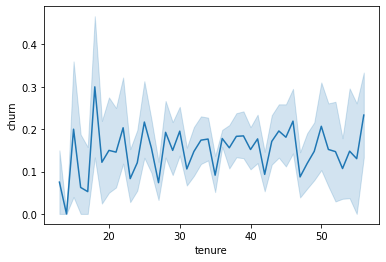

In [25]:
# Plotting tenure with churn frequency
# More varied in the first few months but then starts to even out

sns.lineplot(x = 'tenure', y = 'churn', data = train)

(<AxesSubplot:xlabel='card_type', ylabel='count'>,
 card_type
 Blue        0.162505
 Gold        0.101695
 Platinum    0.222222
 Silver      0.139241
 Name: churn, dtype: float64)

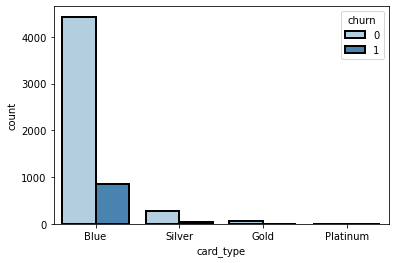

In [26]:
# Churn count grouped by the type of card the customer has, churn ratios on top

sns.countplot(x = 'card_type', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('card_type').churn.mean()

<AxesSubplot:xlabel='dependents', ylabel='count'>

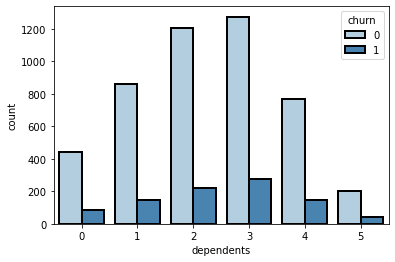

In [27]:
# Churn count grouped by the number of dependents 

sns.countplot(x = 'dependents', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2)

(<AxesSubplot:xlabel='education', ylabel='count'>,
 education
 College          0.153713
 Doctorate        0.202479
 Graduate         0.158282
 High School      0.153914
 Post-Graduate    0.185315
 Uneducated       0.161520
 Name: churn, dtype: float64)

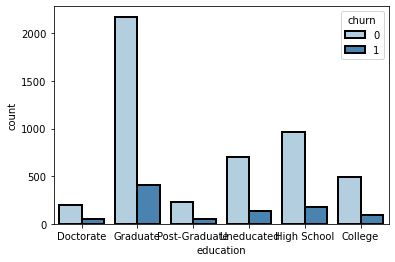

In [28]:
# Churn counts grouped by education level

sns.countplot(x = 'education', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2), train.groupby('education').churn.mean()

In [31]:
train

,churn,age,gender,dependents,education,marital_status,income,card_type,tenure,products_used,...,revolving_bal_tot,avg_open_to_buy,trans_amt_chng_q4_q1,tot_trans_amt,total_trans_ct,ct_chng_q4_q1,avg_card_utilization_ratio,revolving_bal_bin,age_bin,card_util_bin
7897,1,40,F,3,Doctorate,Married,Less than $40K,Blue,21,5,...,0,1728.0,0.410,2191,38,0.357,0.000,0 - 1000,30-40,0-20%
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0 - 1000,40-50,0-20%
2304,0,41,M,3,Post-Graduate,Married,$60K - $80K,Blue,34,4,...,1319,1305.0,0.768,4189,74,0.609,0.503,1000 - 2000,40-50,40-60%
3192,0,39,M,2,Uneducated,Single,$40K - $60K,Blue,25,4,...,1426,7695.0,0.666,4112,80,0.481,0.156,1000 - 2000,30-40,0-20%
8491,0,49,F,3,Graduate,Single,$40K - $60K,Blue,32,1,...,1426,3974.0,0.595,4643,80,0.702,0.264,1000 - 2000,40-50,20-40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9692,0,56,M,2,Graduate,Single,$120K +,Blue,45,2,...,898,10816.0,0.726,13956,122,0.718,0.077,0 - 1000,50-60,0-20%
3225,0,42,M,3,Post-Graduate,Married,$40K - $60K,Blue,29,3,...,1126,1407.0,0.788,3436,74,0.574,0.445,1000 - 2000,40-50,40-60%
5570,0,43,F,3,Graduate,Single,$40K - $60K,Blue,36,5,...,1686,908.0,0.624,4503,67,0.811,0.650,1000 - 2000,40-50,60-80%
8441,0,47,F,4,Graduate,Single,Less than $40K,Blue,34,1,...,860,4896.0,0.708,5298,72,0.714,0.149,0 - 1000,40-50,0-20%


<AxesSubplot:xlabel='revolving_bal_bin', ylabel='count'>

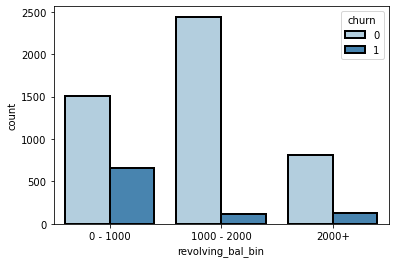

In [32]:
# Churn counts grouped by revolving balance

sns.countplot(x = 'revolving_bal_bin', hue = 'churn', data=train, palette='Blues', ec='black', linewidth=2)